# Lab 5


## Problem 1

### Complexity with Nested Loops
Here is a function that generats all pairs of 2 from two input lists.

In [2]:
def gen_pairs(lst1, lst2):
    """ 
    Generates all possible pairs of items from two lists.
    
    :return: a set of tuples.
    """
    
    pairs = set()
    for aa in lst1:
        for bb in lst2:
            if not (aa, bb) in pairs:
                pairs.add((aa, bb))
    return pairs

In [3]:
# Example run (notice there are no repeated tuples)
gen_pairs([1, 1, 2, 3], [3, 4, 5, 1])

{(1, 1),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 1),
 (3, 3),
 (3, 4),
 (3, 5)}

Let's assume for simplicity that lst1 and lst2 are the same length, `n` for now.

Answer the following:
* How many times is the outer (line 6) loop run?
* How many times is the inner loop (line 7) run?
* The `if` statement on line 8 checks if a tuple exists in the set. Check under sets here https://wiki.python.org/moin/TimeComplexity . What is the time complexity of this statement alone?


Remember that adding to a set (Line 9) is $O(1)$ 


Based on your answers, and the fact that loops will multiply complexity, what is the time complexity of this function? 

#### Solution

<b> How many times is the outer loop run? </b>

> If there are $n$ elements in `lst1` and the loop runs through all of the elements, the outer loop is run $n$ times.

<b> How many times is the inner loop run? </b>

> Since we are still accessing *every* element in `lst2`, the loop is run $n$ times.

<b> The `if` statement on line 8 checks if a tuple exists in the set. Check under sets here https://wiki.python.org/moin/TimeComplexity. What is the time complexity of this statement alone? </b>

> On average, the time complexity is $\mathcal{O}(1)$. At worst, the time complexity is $\mathcal{O}(n)$.

<b> Based on your answers, and the fact that loops will multiply complexity, what is the time complexity of this function? </b>

> From above, the code inside of the loops is run $n^2$ times. If checking for an element achieves its worst time complexity, then each of these $n^2$ loop iterations contains an $\mathcal{O}(n)$ operation, making the total time complexity $\mathcal{O}(n^3)$ at worst. On average, though, checking for the existence of an element is $\mathcal{O}(1)$, in which case the average time complexity of our algorithm is $\mathcal{O}(n^2)$.


## Problem 2

### Prime numbers, again

The `prime` function from lecture is printed below:
    
```python
def prime(n):
    is_prime = True
    # loop through the numbers 2 to (n - 1)
    for m in range(2, n):    
        # if n is evenly divisible by m, we already know n is not a prime
        # so break out of the loop
        if n % m == 0:
            is_prime = False
            break
    if is_prime:
        print(n, " is a prime! ")
    else:
        print(n, " is not a prime")
    return is_prime
```

This function is a brute-force function that checks all numbers between 2 and (n - 1) to see if $n$ has an divisors. Thus it is $O(n)$.

Actually, we really only have to check up to $\sqrt{n}$ -- an integer can only have one factor that is larger than its square root.

Re-write the `prime` function so that it only loops from 2 to $\sqrt n$ (instead of up to $n - 1$).

In [45]:
from math import sqrt

def prime(n):
    """ Returns if True if n is prime and False otherwise"""
    is_prime = True
    for m in range(2, int(sqrt(n)) + 1):
        if n % m == 0:
            is_prime = False
            break
    if is_prime:
        print(f"{n} is a prime!")
    else:
        print(f"{n} is not a prime!")
    return is_prime

In [49]:
# Test to see if `prime` works as intended.

test_cases = {
    2: True,
    5: True,
    8: False,
    16: False,
    103: True
}

for input, expected in test_cases.items():
    assert prime(input) == expected, f"Failes on input {input}."

2 is a prime!
5 is a prime!
8 is not a prime!
16 is not a prime!
103 is a prime!


What is the time complexity of this new prime function?

#### Solution

At worst, the loop in `prime()` will need to be run $\sqrt{n}$ times. For small ints, the modulo operator `%` is likely $\mathcal{O}(1)$, so the overall time complexity is $\mathcal{O}{(\sqrt{n}})$. However, if the inputs are sufficiently large, the time complexity of `%` isn't precisely known, as far as I can tell. In any case, if its time complexity is $\mathcal{O}(f(n))$, then the time complexity of `prime()` is $\mathcal{O}(\sqrt{n}f(n))$.

## Problem 3

Complete the function below that will return the smallest number that is a multiple of both x and y. Use a while loop with brute force method that will check all numbers until it encounters one that is a multiple of both x and y.

In [13]:
def smallest_multiple(x, y):
    """ Returns smallest number that is a multiple of x and y"""
    n = 1
    while True:
        ## replace with your code
        if n % x == 0 and n % y == 0:
            break
        n+=1
    return n

In [28]:
# test smallest_multiple()

# smallest_multiple(10, 4) = 20
# smallest_multiple(2, 3) = 6
# smallest_multiple(3, 14) = 42

test_cases = { 
    (10, 4) : 20,
    (2, 3) : 6,
    (3, 14) : 42
}

for input, expected in test_cases.items():
    assert (
        smallest_multiple(*input) == expected
    ), f"Expected {expected} on {input}, received {smallest_multiple(*input)}."

print("Test cases passed!")

Test cases passed!


### Problem 3.1

What is the time complexity worst case of smallest_multiple as a function of x and y?

#### Solution

In general, the least common multiple of two numbers is equal to their product divided by their greatest common divisor:
$$
\text{lcm}(x,y) = \frac{xy}{\gcd(x,y)}
$$

`smallest_multiple()` achieves its highest time complexity when the inputs are coprime, i.e., if $\gcd(x, y) = 1$. In this case, it would take $xy$ divisibility tests (each of which is $\mathcal{O}(1)$) to terminate the program. This complexity is maximized if $x$ and $y$ differ by $1$. In this case if $\max(x, y) = n$, this gives an $\mathcal{O}(n^2)$ algorithm.

## Problem 4

### Write an approximation function

Write a function `approx_log` that will approximate the log base `b` of an input `n` based on an `epsilon` accuracy and `step`. The function should check all numbers 

Recall that 
$x = \log _b a$ means that $b^x = a$

Use the `ctr` variable to count how many times the while loop is run. 

The function should return both `rtn` and `ctr`.

In [2]:
# Write your function here
def approx_log(b, n, epsilon=0.01, step=0.001):
    """ Find the approximate log base b of n"""
    # start with 0 so that log(base=b, n=1) returns 0
    rtn = 0 
    ctr = 1

    # use a while loop to continuously check if b ** rtn is close enough to n
    ### your code here 
    try:
        while abs(b**rtn - n) >= epsilon:
            rtn += step
            ctr += 1
        return rtn, ctr
    except OverflowError:
        print(f"No log({b=}, {n=}) found within tolerance.")
        return None, None

In [81]:
# Test potential overflow error
approx_log(b = 2, n = 8.5, epsilon=0.001, step=1)

No log(b=2, n=8.5) found within tolerance.


(None, None)

### Problem 4.2
Run the code below to plot the `ctr` variable with increasing input `n` when finding $log_2(n)$. Based on what the plot looks like, what is the time complexity of the `approx_log` function is? Does this make sense based on what the `while` loop is?

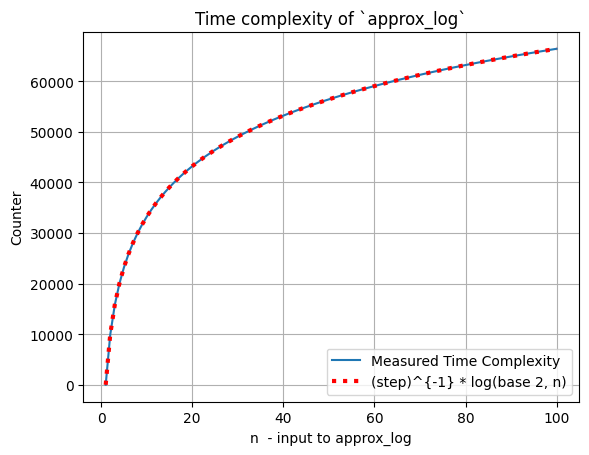

In [30]:
import numpy as np
import matplotlib.pyplot as plt

x_arr = np.linspace(1, 100, 100)

b = 2
epsilon = 0.01
step = 0.0001

ctr_arr = np.zeros(np.shape(x_arr))
for idx, x in enumerate(x_arr):
    res, ctr = approx_log(b, x, epsilon, step)
    ctr_arr[idx] = ctr

plt.plot(
    x_arr, 
    ctr_arr, 
    label="Measured Time Complexity"
)

plt.plot(
    x_arr, 
    (1 / step) * np.log2(x_arr), 
    color='red', 
    linestyle=':', 
    linewidth=3, 
    label="(step)^{-1} * log(base 2, n)"
)

plt.title("Time complexity of `approx_log`")
plt.xlabel("n  - input to approx_log")
plt.ylabel("Counter")
plt.grid()
plt.legend(loc='lower right')
plt.show()

#### Solution

The plot suggests that the counter is logarithmic in the input size, i.e., that the time complexity of `approx_log` is $\mathcal{O}(\log n)$.

This is as expected, since we are looping over the values of `rtn` until `b ** rtn` is within `epsilon` of `a`. If we start counting at `rtn = 0` and increment `rtn` by `step` at each iteration, it will take 
$$
(\text{step})^{-1} \log_2 n \in \mathcal{O}(\log n)
$$
operations to terminate the procedure.